<a href="https://colab.research.google.com/github/DanOliveira-DS/data_science/blob/master/%5BBr%5D_NHL_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados e Inteligência Artificial - NHL

<p align="center">
  <img width=450 heigth=200 src="https://s3.amazonaws.com/walrus-assets/img/web_hockey_basen_art.jpg">
</p>


https://puckpedia.com/stats

Muito inspirado por Michael Lewis e seu livro "Moneyball: The Art of Winning an Unfair Game" (leitura obrigatória para amantes da area que foi adaptado para o cinema com o título "O Homem que Mudou o Jogo", do diretor Bennett Miller) mostrou como a análise de dados aliado a um plano de jogo pode ser uma combinação fantástica. Nos últimos anos os avanços na tecnologia (dispositivos e sensores wearable como pulseiras eletrônicas, coletes, dispositivos GPS e outras tecnologias inteligentes) nos permitiram coletar cada vez mais dados. 

Entretanto, um monte de dados acumulados não são úteis se você não consegue interpretá-los. Portanto, tão importante quanto coletar dados estatísticos é saber decifrá-los. Com isso, a ciência de dados aplicada aos esportes já é uma realidade porque agora somos capazes de gerar valor através desses dados ajudando assim nas tomadas de decisão.

A análise desses novos dados possibilitou não apenas verificar estatísticas clássicas (vitorias, derrotas, gols feitos, gols sofridos..), mas tambem as estatísticas avançadas que procuram entender as diferentes maneiras com que uma jogada ou jogador pode influenciar uma partida. Com isso os times passaram a ser mais competitivos, sendo capazes de se prepararem  para um adversário ou até mesmo um jogador especifico que querem anular em uma partida. Tudo isso graças ao cruzamento de dados do histórico de desempenho dos atletas.     
    
Outro uso da coleta desses dados está em beneficiar as grandes organizações com dados sociais, onde pode-se encontrar padrões e formar grupos(*clusters*) usando algoritmos de *clustering*, dentro da base de fãs e executar campanhas em grupos-alvo. Conhecendo os fatores que mais atraem os fãs, a gestão das equipes pode se concentrar em melhorar esse aspecto, o que leva a ganhar novos fãs e reter os mais antigos. Os fãs podem ser alimentados com uma quantidade enorme de previsões e possibilidades em tempo real com as estatísticas do seu time ou jogador favorito onde podem comparar a sua performance com os outros jogadores no time rival ou do mesmo time.

A ciencia de dados tenta da sua maneira explorar as mesmas perguntas que os fãs e os treinadores se perguntam: quem eu acho que vai ganhar, e por quê? Quem são os melhores jogadores do mundo neste momento? Que estratégias são melhores, e porquê?

Mas é bom não confiar cegamente nas estatísticas. Por mais que o esporte americano seja excelente para criar uma base sólida de dados, o fator humano nunca pode ser deixado de lado. As estatísticas podem dizer algo, mas o contexto precisa ser levado em conta. Fatores que ainda não são representados nos dados, como a condição psicológica e o humor dos jogadores, também são chaves importantes na hora de analisar o jogo.
    

**A National Hockey League (NHL)**

A National Hockey League (NHL) é a liga de hóquei no gelo, que abriga os times dos Estados Unidos e do Canadá. São 31 equipes divididas em quatro divisões e duas conferências. Cada equipe disputa 82 partidas na temporada regular. As oito melhores equipes de cada conferência avançam para os playoffs, onde os vencedores de cada conferência decidem a Stanley Cup. Para mais informações a respeito da liga acesse o blog da [NHL Brasil](https://www.nhlbrasil.com.br/nhl)

<p align="center">
  <img width=200 src="https://upload.wikimedia.org/wikipedia/en/thumb/3/3a/05_NHL_Shield.svg/800px-05_NHL_Shield.svg.png">
</p>
    
O objetivo desse projeto é analisar os dados da *National Hockey League* (NHL) que abrange as temporadas de 2010-2011 ate 2018-2019. Com o intuito de gerar *insights* e encontrar soluções de Inteligência Artificial. Comparado com outros esportes, as estatísticas avançadas no Hockey ainda são "infantis". Tem sido sugerido que os melhores modelos só podem prever o vencedor 62% das vezes devido a variações no talento dos jogadores e na "sorte do disco".

<p align="center">
  <img width=550 src="https://www.si.com/.image/c_limit%2Ccs_srgb%2Cq_auto:good%2Cw_860/MTY4MzE2NDExNTQ0ODcyMTAx/spot2-hockey.webp">
</p>

# Aquisição dos dados
Os dados que usaremos nesse projeto foram coletados utilizando a **NHL stats API** e desponibilizados por Martin Ellis na plataforma Kaggle. Não são apenas os resultados e as estatísticas dos jogos da NHL, mas também detalhes de jogadas individuais, como chutes, gols e defesas, incluindo data e hora e coordenadas x,y.

Ao total são 9 conjuntos de dados:

* **game.csv**: Reúne os registros de cada jogo no conjunto de dados;

* **game_golie_stats.csv**: As estatísticas dos goleiros que participaram dos jogos;

* **game_play.csv**: As jogadas individuais de cada jogo;

* **game_play_player.csv**: Os jogadores envolvidos em uma jogada;

* **game_shifts.csv**: Detalhes a respeito dos turnos dos jogadores;

* **game_skater_stats.csv**: As estatísticas básicas dos jogadores. 36 entradas por jogo, uma para cada jogador do time;

* **game_teams_stats.csv**: As estatísticas básicas das equipes. Cada jogo terá duas entradas nesta tabela, uma para cada equipe;

* **player_info.csv**: Informações sobre os jogadores;

* **team_info.csv**: informação sobre as equipes. 

que se relacionam como apresentado na tabela abaixo

<p align="center">
   <img width=900 src="https://github.com/DanOliveira-DS/nhl_project/blob/master/images/table_relationships.JPG?raw=true">
</p>


Caso esteja interessado em ver como os dados são coletados, indico o vídeo do [Kevin Sidwar](https://www.youtube.com/watch?v=avp7fvuMT1E&t=214s). Ele é também um dos responsaveis por dar inicio a documentação da NHL stats api


In [0]:
# suprimir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importar os pacotes necessários
import numpy as np # algebra linear
import pandas as pd # processamento dos dados
import datetime

# visualização
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
sns.set_style('white')


# machine learning
#from sklearn.model_selection import train_test_split, KFold, cross_val_score
#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import Pipeline



Para facilitar a aquisição dos dados, criei um [link](https://github.com/DanOliveira-DS/nhl_project/tree/master/datasets) com acesso direto aos aquivos csv no meu GitHub. Com isso, basta acessar o conjunto de dados que você quiser, clicar em ***raw*** e copiar a ***url***. Assim você pode importar o conjunto de dados usando o método `pd.read_csv()` como abaixo.

Para as nossas primeiras analises vamos utilizar os conjuntos de dados:
* **game.csv**;
* **team_info.csv**.

Vamos importa-los.


In [0]:
# importando conjunto de dados game.csv
game_filepath = "https://raw.githubusercontent.com/DanOliveira-DS/nhl_project/master/datasets/game.csv"
game_df = pd.read_csv(game_filepath)

# importando conjunto de dados team_info.csv
team_info_filepath = "https://raw.githubusercontent.com/DanOliveira-DS/nhl_project/master/datasets/team_info.csv"
teamNames = pd.read_csv(team_info_filepath)

Com os dados importados para dentro de uma estrutura Dataframe - vamos verificar como nossos dados então apresentados utilizando o método `pd.head()` . Nosso intuito e verificar se há necessidade de algum ajuste ou configuração antes de se iniciar uma análise exploratória dos dados a fim de preparar um modelo de Machine Learning.

In [39]:
# verificando as primeiras entradas game.csv
game_df.head(3)


,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
1,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,4,1,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT


In [40]:
# verificando as primeiras entradas team_info.csv
teamNames.head()

,team_id,franchiseId,shortName,teamName,abbreviation,link
0,1,23,New Jersey,Devils,NJD,/api/v1/teams/1
1,4,16,Philadelphia,Flyers,PHI,/api/v1/teams/4
2,26,14,Los Angeles,Kings,LAK,/api/v1/teams/26
3,14,31,Tampa Bay,Lightning,TBL,/api/v1/teams/14
4,6,6,Boston,Bruins,BOS,/api/v1/teams/6


Para entender melhor nossos conjuntos de dados vamos fazer um dicionario das principais variaveis. 

para nosso primeiro conjunto de dados temos:
* `game_id` - codigo do jogo;
* `season` - temporada em que aconteceu o jogo
* `type` - R = jogo da temporada regular, P = jogo dos playoffs
* `date_time` e `date_time_GMT` - Data que ocorreu o jogo e seu horario
* `away_team_id` - identificador do time visitante
* `home_team_id` - identificador do time mandante
* `away_goals` - numero de gols feito pelo time visitante
* `home_goals` - numero de gols feito pelo time mandante
* `outcome` - resultado da partida
as demais variáveis não acresentam as nossas anilies e podem ser descartadas mais a frente

Para nosso segundo conjunto de dados as variaveis relevantes são:
 * `team_id` - identificador do time
 * `team_name` - nome do time correspodente

 podemos então mapear esses dados para deixar nosso primeiro conjunto de dados mais legivel 


Um passo importante é criar uma copia dos dados originais para salvaguardar nossos dados.



In [0]:
# copia do conjunto de dados original
game_clean = game_df.copy()


# mapeando team_id e teamName
team_dict = teamNames.set_index('team_id')['teamName'].to_dict()

# aplicando no nosso DataFrame
game_clean['away_team_id'].replace(team_dict, inplace=True)
game_clean['home_team_id'].replace(team_dict, inplace=True)


Agora temos os nomes dos time ao inves dos "ids", o que torna a leitura do nosso DataFrame mais fácil, vamos verficar

In [42]:
# verificando o novo DataFrame
game_clean.head()

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,Devils,Flyers,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
1,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,Devils,Flyers,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,Flyers,Devils,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
3,2011030224,20112012,P,2012-05-06,2012-05-06T23:30:00Z,Flyers,Devils,2,4,home win REG,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
4,2011030225,20112012,P,2012-05-08,2012-05-08T23:30:00Z,Devils,Flyers,3,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT


Outro ajuste interresante a se fazer diz respeito as colunas date_time e date_time_GMT. Isso porque o quando o carregamos os dados para o DataFrame o pandas pode interpretar esses dados de forma incorreta. Assim perdemos o poder das series temporais.

Para ver os tipos dos dados basta chamar o método `pd.dtypes` ou `pd.info()`

In [43]:
game_clean.dtypes

game_id                    int64
season                     int64
type                      object
date_time                 object
date_time_GMT             object
away_team_id              object
home_team_id              object
away_goals                 int64
home_goals                 int64
outcome                   object
home_rink_side_start      object
venue                     object
venue_link                object
venue_time_zone_id        object
venue_time_zone_offset     int64
venue_time_zone_tz        object
dtype: object

Nosso resultado mostra que o pandas de fato interpetou nossas variaveis `date_time` e `date_time_GMT` como sendo do tipo *object*. Para converte-las vamos utilizar a biblioteca *datetime* que importamos la no inicio

In [0]:
# iterando sobre as colunas dates
for column in ['date_time', 'date_time_GMT']:
    # aplicando a tranformação
    game_clean[column] = pd.to_datetime(game_clean[column], format="%Y-%m-%d %H:%M")
    


In [0]:
# removendo fuso horario
game_clean['date_time_GMT'] = game_clean['date_time_GMT'].dt.tz_convert(None)


Vamos chamar o metodo `pd.dtypes` mais uma vez para verificar se a conversão foi bem sucedida

In [46]:
game_clean.dtypes

game_id                            int64
season                             int64
type                              object
date_time                 datetime64[ns]
date_time_GMT             datetime64[ns]
away_team_id                      object
home_team_id                      object
away_goals                         int64
home_goals                         int64
outcome                           object
home_rink_side_start              object
venue                             object
venue_link                        object
venue_time_zone_id                object
venue_time_zone_offset             int64
venue_time_zone_tz                object
dtype: object

Perfeito!

Agora vamos renomear e ordenar as colunas. Como dito antes vamos excluir as colunas que não precisaremos para as analises. 

colunas excluidas:
* `date_time` - temos uma coluna igual
* `[venue, venue_link, venue_time_zone_id, venue_time_zone_offset e venue_time_zone_tz]`


In [0]:
# excluindo colunas
game_clean.drop(['date_time','venue','venue_link',
                 'venue_time_zone_id','venue_time_zone_offset','venue_time_zone_tz',
                'home_rink_side_start'],
               axis=1, inplace=True)

In [0]:
# estabelecendo nova ordem ao DataFrame
game_clean = game_clean[['game_id', 'date_time_GMT', 'away_team_id', 'away_goals', 'home_goals',
                         'home_team_id', 'type', 'season', 'outcome', ]].rename(columns={'away_team_id': 'awayTeam',
                                                                                           'home_team_id': 'homeTeam'})

In [49]:
game_clean.head(3)

,game_id,date_time_GMT,awayTeam,away_goals,home_goals,homeTeam,type,season,outcome
0,2011030221,2012-04-29 19:00:00,Devils,3,4,Flyers,P,20112012,home win OT
1,2011030222,2012-05-01 23:30:00,Devils,4,1,Flyers,P,20112012,away win REG
2,2011030223,2012-05-03 23:30:00,Flyers,3,4,Devils,P,20112012,home win OT


Agora nosso conjunto de dados esta pronto para ser analisado. Vamos começar

# Analise Exploratória dos Dados


## Tamanho do conjunto de dados

In [50]:
# Tamanho do Conjunto de Dados
print("TAMANHO DO CONJUNTO DE DADOS:")
print(f"Observações: {game_clean.shape[0]}")
print(f"Variáveis: {game_clean.shape[1]}")

TAMANHO DO CONJUNTO DE DADOS:
Observações: 11434
Variáveis: 9


## Tipos dos nossos dados

In [51]:
# tipo dos dados
print(game_clean.dtypes)


game_id                   int64
date_time_GMT    datetime64[ns]
awayTeam                 object
away_goals                int64
home_goals                int64
homeTeam                 object
type                     object
season                    int64
outcome                  object
dtype: object


In [52]:
# valores nulos
game_clean.isnull().sum()

game_id          0
date_time_GMT    0
awayTeam         0
away_goals       0
home_goals       0
homeTeam         0
type             0
season           0
outcome          0
dtype: int64

## Resumo estatístico das informações

Uma das maneiras mais simples de se iniciar uma análise exploratória das variáveis numéricas é utilizando o método describe().

Imediatamente você obtém um resumo contendo algumas das principais informações estatísticas relevantes:

* count - quantidade de entradas válidas
* mean - média dos valores
* std - desvio padrão
* min - menor valor da coluna
* 25% - percentil 25
* 50% - percentil 50 (mediana)
* 75% - percentil 75
* max - maior valor da coluna

É possível identificar de cara colunas com valores ausentes e possíveis outliers (por exemplo, olhando o valor da mediana e comparando com valores máximos e mínimos)

In [53]:
# resumo estatistico
game_clean.describe()


,game_id,away_goals,home_goals,season
count,1.143400e+04,11434.000000,11434.000000,1.143400e+04
mean,2.014134e+09,2.659174,2.929334,2.014315e+07
std,2.609619e+06,1.589533,1.680219,2.609893e+04
min,2.010020e+09,0.000000,0.000000,2.010201e+07
25%,2.012020e+09,1.000000,2.000000,2.012201e+07
50%,2.014021e+09,3.000000,3.000000,2.014202e+07
75%,2.016021e+09,4.000000,4.000000,2.016202e+07
max,2.018030e+09,10.000000,10.000000,2.018202e+07


Para visualizar melhor o nosso resultado vamos fazer uso de gráficos:

* Para nossas variáveis `game_id` e `season` vamos utilizar um histograma.

* Para as variáveis `away_goals` e `home_goals` vamos utilizar o diagrama de caixa ou Boxplot

### Histograma
É um gráfico de distribuição de frequência, e que permite analisar visualmente como nossa amostra/população está distribuída.

Vamos à visualização:

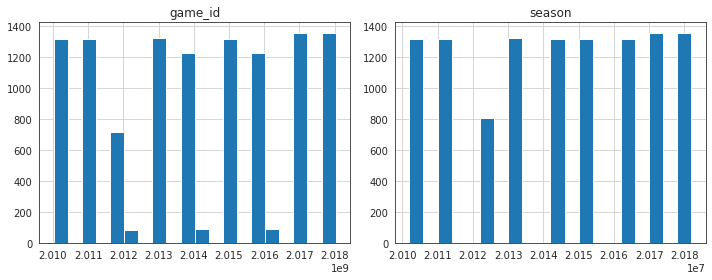

In [54]:
# histograma
game_clean[['game_id','season']].hist(bins=20, figsize=(10, 4))
plt.tight_layout()


As conclusões que podemos tirar do grafico são:
* A temporada (`season`) 2012-2013 foi menor que as demais. O motivo foi o chamado *lockout*  que é quando os empregadores deixam de oferecer as condições necessárias para seus empregados trabalharem, visando mudanças em algum acordo coletivo. Na temporada em questão tivemos apenas 48 jogos. Para ler mais acesse [NHeLas](http://nhelas.com/o-que-e-um-lockout-e-como-funciona/) 


### Boxplot  
Boxplot é uma forma padronizada de exibir a distribuição dos dados com base em um resumo de cinco números ("mínimo", primeiro quartil (Q1), mediana, terceiro quartil (Q3), e "máximo") o que casa muito bem com o método `pd.describe()` que utilizamos.

Ele pode informá-lo sobre os seus outliers, que são unidades discrepantes em relação ao restante da distribuição e quais são os seus valores. Pode também dizer se os seus dados são simétricos, o quanto os seus dados estão agrupados, e se os seus dados estão enviesados.

Numa representação de Boxplot, como o da imagem abaixo, os Outliers são representados como pontos individuais além do ponto máximo, ou abaixo do ponto mínimo.

Vamos à visualização:

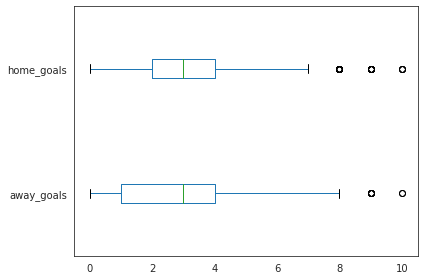

In [55]:
# box plot
game_clean[['away_goals','home_goals']].plot(kind='box', vert=False)
plt.tight_layout()

Conclusões acerca dos boxplots:

* Para ambas variáveis temos valores minimos igual a 0, algo esperado já que 
não temos gols negativos;
* Os times visitantes tendem a fazer 1 gol 25% das vez enquanto os mandantes está na casa dos 2 gols
* A mediana de gols é igual;
* Para ambas as variáveis o valor maximo discrepante foi 10, vamos ver quais foram os jogos.


In [56]:
# away_goals e home_goals = 10
game_clean[(game_clean['away_goals']>=10) | (game_clean['home_goals']>=10)]

,game_id,date_time_GMT,awayTeam,away_goals,home_goals,homeTeam,type,season,outcome
221,2011030144,2012-04-18 23:30:00,Penguins,10,3,Flyers,P,20112012,away win REG
4796,2017020398,2017-12-03 00:00:00,Red Wings,1,10,Canadiens,R,20172018,home win REG
5702,2016020414,2016-12-11 00:00:00,Avalanche,1,10,Canadiens,R,20162017,home win REG
6732,2016020158,2016-11-04 23:00:00,Canadiens,0,10,Blue Jackets,R,20162017,home win REG
7401,2017020010,2017-10-06 00:30:00,Penguins,1,10,Blackhawks,R,20172018,home win REG
10571,2010021148,2011-03-30 23:30:00,Blues,10,3,Red Wings,R,20102011,away win REG


Tivemos 6 casos onde os times foram capazes de marcar 10 gols em uma mesma partida. A maior liderança foi do time do Blue Jackets contra Montreal Canadiens. 
Link para video [aqui](https://www.nhl.com/bluejackets/video/recap-mtl-0-cbj-10/t-277437100/c-46026003)


## Distribuição entre numero de jogos da temporada regular e os playoffs


Numero de jogos da temporada regular: 10642
Numero de jogos dos playoffs: 792


Gráfico:



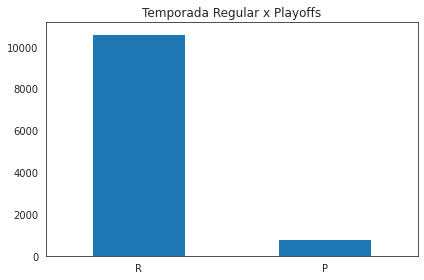

In [57]:
# type R e P
dist_games = game_clean["type"].value_counts()
print(f"Numero de jogos da temporada regular: {dist_games['R']}")
print(f"Numero de jogos dos playoffs: {dist_games['P']}\n\n")

# grafico
print("Gráfico:\n")
fig, ax = plt.subplots(figsize=(6, 4))
game_clean["type"].value_counts().plot(kind="bar", ax=ax)
ax.set_title("Temporada Regular x Playoffs")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()

Essa grande diferença no gráfico se deve ao formato da temporada regular e os playoffs. Na temporada regular temos 82 jogos por time, já nos playoffs temos 4 fases onde as partidas são disputadas em jogos melhores de 7. Onde o máximo de jogos que uma equipe pode disputar são 28 e o mínimo 16.

## Distribuição dos tipos de resultados

No hockey uma partida pode terminar de três formas. A primeira delas é quando a equipe vence o jogo no tempo regulamentar (60 minutos divido em 3 períodos) o que concede ao time vencendor dois pontos. 

Caso o jogo termine empatado, temos então a prorrogação (*Overtime*) de 5 minutos onde quem marcar primeiro vence. Caso não haja gols, a disputa vai para os pênaltis (*Shootout*). Nos dois casos a equipe vencedora recebe um ponto

Vamos ver como esta a distribuição dos nosso resultados (*outcome*) no nosso conjunto de dados.

dicionário das varíaveis:

* `home win REG` - vítoria time mandante no tempo regular
* `away win REG` - vítoria time visitante no tempo regular
* `home win OT` - vitória time mandande na prorrogação
* `away win OT` - vítoria time visitante no prorrogação
* `home win SO` - vítoria time mandante no shootout
* `away win SO` - vítoria time visitante no shootout


home win REG    4857
away win REG    3881
home win OT      791
away win OT      734
away win SO      591
home win SO      580
Name: outcome, dtype: int64


Grafico comparando os tipos de resultado:



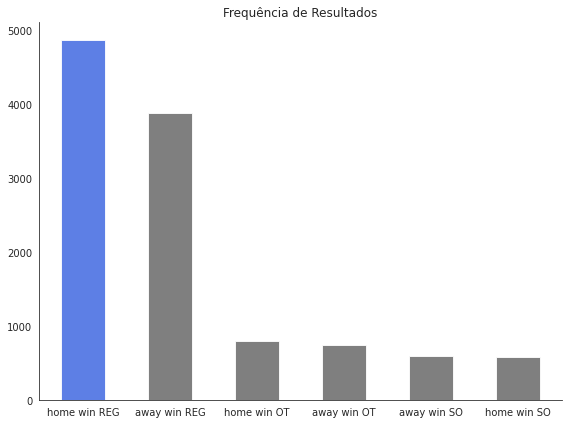

In [194]:
# usando value_counts()
print(f"{game_clean['outcome'].value_counts()}\n\n")

# visualização grafica
colors = ['royalblue', 'dimgray', 'dimgray','dimgray','dimgray','dimgray']

print("Grafico comparando os tipos de resultado:\n")
fig, ax = plt.subplots(figsize=(8, 6))
game_clean['outcome'].value_counts().plot(kind='bar', colors=colors, alpha=0.85, ax=ax)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Frequência de Resultados")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()


As conclusões que podemos tirar do grafico são:
* As vitorias no tempo regulamentar são mais frequentes que os outros tipos de resultados;
* Os times que jogam em casa tendem a vencer mais seus jogos. 


Para facilitar as proximas analises vamos realizar algumas etapas:
1. Separar nosso conjunto de dados em dois um para jogos em casa e outro para jogos. Inserir uma coluna `ground` que vai informar caso o jogo aconteceu em casa ou fora de casa
2. Juntar tudo em um unico conjunto de dados
3. Uma coluna `outcome` informando se o time saiu vitorioso ou não

In [0]:
# DataFrame de jogos em casa
games_home_df = game_clean[['game_id','date_time_GMT','homeTeam','home_goals',
                            'away_goals','type','season']].rename(columns={'homeTeam':'teamName','home_goals':'goals_scored',
                                                                          'away_goals':'goals_conceded'})
                            
# DataFrame de jogos fora de casa
games_away_df = game_clean[['game_id','date_time_GMT','awayTeam','away_goals',
                            'home_goals','type','season']].rename(columns={'awayTeam':'teamName','away_goals':'goals_scored',
                                                                          'home_goals':'goals_conceded'})


In [0]:
# Alimentando coluna ground para jogos em casa
games_home_df = games_home_df.assign(ground='Home')

# Alimentando coluna ground para jogos fora de casa
games_away_df = games_away_df.assign(ground='Away')

In [0]:
# juntando os dois dataframes em um só
games_df = pd.concat([games_home_df, games_away_df])

# inserindo coluna do resultado (outcome)
games_df = games_df.assign(outcome=games_df.apply(lambda x: 'Win' if (x['goals_scored'] > x['goals_conceded']) else 'Lose', axis=1))

In [62]:
# visualizando novo conjunto de dados
games_df.head()

,game_id,date_time_GMT,teamName,goals_scored,goals_conceded,type,season,ground,outcome
0,2011030221,2012-04-29 19:00:00,Flyers,4,3,P,20112012,Home,Win
1,2011030222,2012-05-01 23:30:00,Flyers,1,4,P,20112012,Home,Lose
2,2011030223,2012-05-03 23:30:00,Devils,4,3,P,20112012,Home,Win
3,2011030224,2012-05-06 23:30:00,Devils,4,2,P,20112012,Home,Win
4,2011030225,2012-05-08 23:30:00,Flyers,1,3,P,20112012,Home,Lose


## Qual time tem o maior numero de jogos?

Hora de verificar quais os times que mais jogaram na **NHL** (2010-2011 ~ 2018-2019). Nosso resultado vai apresentar a quantidade desses jogos na temporada regular os playoffs e a soma total.

In [0]:
# separando o conjunto de dados em jogos da temp regular
regular_df = games_df[games_df['type']=='R']
regular_series = regular_df.teamName.value_counts() # criando a series
regular_series = regular_series.rename("jogos_regular") # renomeando a series

# separando o conjunto de dados em jogos dos playoffs
playoffs_df = games_df[games_df['type']=='P']
playoffs_series = playoffs_df.teamName.value_counts() # criando a series
playoffs_series = playoffs_series.rename("jogos_playoffs") # renomeando a series


In [64]:
# concatenando duas series para criar o dataframe
jogos_df = pd.concat([regular_series,playoffs_series], axis=1)
jogos_df.fillna(0, inplace=True) # inserindo valor zero aos valores NaN
jogos_df['jogos_playoffs'] = jogos_df['jogos_playoffs'].astype('int32') # mudando tipo de dado da coluna
jogos_df['total_jogos'] = jogos_df['jogos_regular'] + jogos_df['jogos_playoffs'] # coluna que vai armazenar a soma dos jogos 
jogos_df.sort_values(by='total_jogos', ascending=False)

,jogos_regular,jogos_playoffs,total_jogos
Penguins,704,111,815
Bruins,704,108,812
Sharks,704,101,805
Capitals,704,100,804
Rangers,704,98,802
Blackhawks,704,89,793
Lightning,704,86,790
Blues,704,84,788
Predators,704,83,787
Kings,704,79,783


Vamos representar nosso resultado de forma gráfica. A biblioteca seaborn nos possibilita escolher as cores que queros utilizar em suas barras, resolvi então mapear o nome do time com sua cor principal como mostra o codigo abaixo. No intuito de deixar o gráfico mais estilizado

In [0]:
# Cores dos times
teams_color_palette = ['#CFC493',  # Penguins
                       '#FFB81C',  # Bruins
                       '#006D75',  # Sharks
                       '#041E42',  # Capitals
                       '#0038A8',  # Rangers
                       '#CF0A2C',  # Blackhawks
                       '#002868',  # Lightning
                       '#002F87',  # Blues
                       '#FFB81C',  # Predators
                       '#111111',  # Kings
                       '#F47A38',  # Ducks
                       '#CE1126',  # Canadiens
                       '#AF1E2D',  # Red Wings
                       '#154734',  # Wild
                       '#C52032',  # Senators
                       '#F74902',  # Flyers
                       '#00205B',  # Canucks
                       '#006847',  # Islanders
                       '#00539B',  # Stars
                       '#CE1126',  # Devils
                       '#002654',  # Maple Leafs
                       '#00205B',  # Blue Jackets
                       '#6F263D',  # Avalanche
                       '#8C2633',  # Flames
                       '#C8102E',  # Coyotes
                       '#CC0000',  # Hurricanes
                       '#041E42',  # Oilers
                       '#C8102E',  # Panthers
                       '#002654',  # Sabres
                       '#041E42',  # Jets
                       '#B4975A',  # Golden Knights
                       '#5C88DA',  # Thrashers
                       ]

teste = ['#f0f0f0','#bdbdbd','#636363']

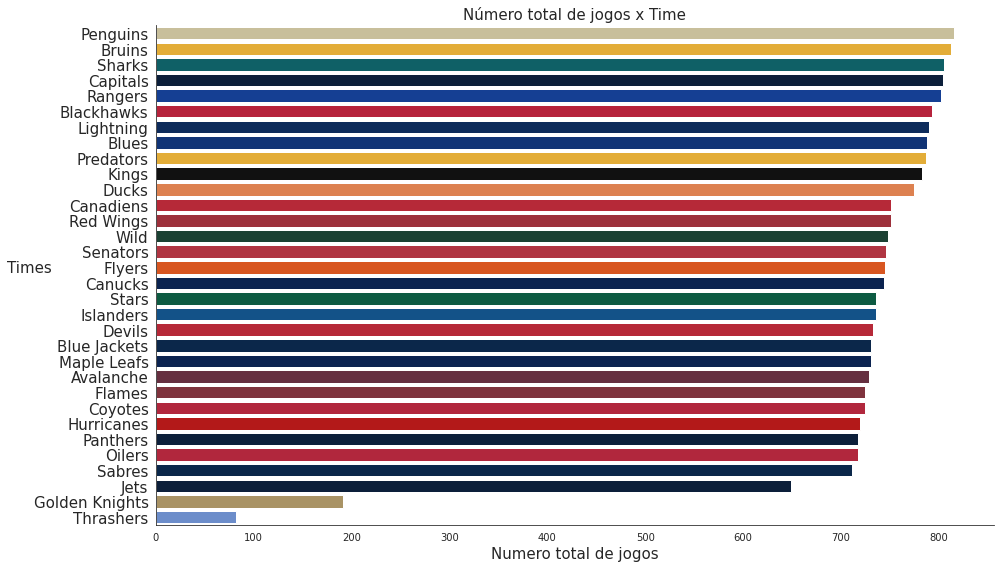

In [177]:
# Grafico que mostra numero total de jogos e o respecitivo time
sns.set_palette("pastel")

fig, ax = plt.subplots(figsize=(14, 8))
sns.countplot(y='teamName', data=games_df,
              order=games_df['teamName'].value_counts().index, palette=teams_color_palette,  ax=ax)

ax.set_title("Número total de jogos x Time", fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
ax.set_ylabel("Times", rotation=0, fontsize=15)
ax.set_xlabel("Numero total de jogos", fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

In [167]:
clrs = ['grey' if (x < max(games_df['teamName'].value_counts()) else 'green' for x in (games_df['teamName'].value_counts())]

SyntaxError: ignored

* Aqui vale ressaltar que o time do Atlanta Thrasher jogou na NHL entre os periodos de 1999–2011 depois mudou a franquia para Winnipeg adotando o nome de Winnipeg Jets. E como nossos dados abragem as temporadas de 2010-2011 ~ 2018-2019  só temos o registro da ultima tenpora dos Thrashers consequentemente seus ultimos 82 jogos.

 
 * No caso do Golden Knights ele é uma fraquia que estreiou na NHL na temporada 2017-18. Onde acabou indo muito bem em seu primeiro ano, chegando ate as finais da Stanley Cup onde perdeu para Washington Capitals

## Desempenho das equipes
Agora que sabemos o numero total de jogos por equipe, hora de analisar os aproveitamentos. Nosso intuito é verificar o desempenho dos times como mandantes e visitante tanto na temporada regular como nos playoffs. Com o propósito de verificar a performance das equipes tendo em vista que os playoffs é uma outra etapa da competição.




In [0]:
# criando DataFrame que vai conter o aproveitamento geral dos times
team_wins = games_df.groupby(['teamName'])['outcome'].value_counts(normalize=True)

team_wins_lose_df = team_wins.loc[:, ['Win']].unstack().sort_values(by='Win', ascending=False)
team_wins_lose_df = team_wins_lose_df[['Win']].rename(columns={'Win':'%_vitórias'})


In [0]:
# filtrando dados da temporada regular
temp_regular_df = games_df[games_df['type']=='R']

# Series com desempenho geral dos times
apro_temp_regular = temp_regular_df.groupby(['teamName'])['outcome'].value_counts(normalize=True)
apro_temp_regular_series = apro_temp_regular.loc[:, ['Win']].unstack().sort_values(by='Win', ascending=False)
apro_temp_regular_df = apro_temp_regular_series[['Win']].rename(columns={'Win':'%_vitórias'})
geral_regular = apro_temp_regular_df


# criando Series com resultados
homeCourt_wins_out_regular = temp_regular_df.groupby(['teamName','ground'])['outcome'].value_counts(normalize=True)
# criando DF com metodo pd.unstack()
HC_df_regular = homeCourt_wins_out_regular.unstack()
HC_df_regular = HC_df_regular[['Win']].rename(columns={'Win':'%_vitórias'}) # renomeando colunas


# desempenho nos jogos em casa
home_regular = HC_df_regular.loc[(slice(None), slice('Home','Home')), :].sort_values(by='%_vitórias', ascending=False)

# desempenho nos jogos fora de casa
away_regular = HC_df_regular.loc[(slice(None), slice('Away','Away')), :].sort_values(by='%_vitórias', ascending=False)




In [0]:
# filtrando dados referente aos playoffs
temp_playoffs_df = games_df[games_df['type']=='P']

# Series com desempenho geral dos times nos playoffs
apro_temp_playoffs = temp_playoffs_df.groupby(['teamName'])['outcome'].value_counts(normalize=True)
apro_temp_playoffs_series = apro_temp_playoffs.loc[:, ['Win']].unstack().sort_values(by='Win', ascending=False)
apro_temp_playoffs_df = apro_temp_playoffs_series[['Win']].rename(columns={'Win':'%_vitórias'})
geral_playoffs = apro_temp_playoffs_df

# criando Series com resultados
homeCourt_wins_out_playoffs = temp_playoffs_df.groupby(['teamName','ground'])['outcome'].value_counts(normalize=True)

# criando DF com metodo pd.unstack()
HC_df_playoffs = homeCourt_wins_out_playoffs.unstack()
HC_df_playoffs = HC_df_playoffs[['Win']].rename(columns={'Win':'%_vitórias'}) # renomeando colunas

# desempenho nos playoffs - casa
home_playoffs = HC_df_playoffs.loc[(slice(None), slice('Home','Home')), :].sort_values(by='%_vitórias', ascending=False) # filtrando para jogos dentro de casa
# desempenho nos playoffs - fora de casa
away_playoffs = HC_df_playoffs.loc[(slice(None), slice('Away','Away')), :].sort_values(by='%_vitórias', ascending=False) # filtrando para jogos dentro de casa


In [70]:
# unindo desempenhos da temporada regular e playoffs - casa
home_regular_playoffs = pd.merge(home_regular, home_playoffs, on='teamName')
# unindo desempenhos da temporada regular e playoffs - fora de casa
away_regular_playoffs = pd.merge(away_regular,away_playoffs, on='teamName')
# unindo os DataFrames criados
aprovTotal = pd.merge(home_regular_playoffs,away_regular_playoffs, on='teamName')
# renomeando as colunas
aprovTotal = aprovTotal.rename(columns={'%_vitórias_x_x':'aprovCasa_regular','%_vitórias_y_x':'aprovCasa_playoffs','%_vitórias_x_y':'aprovFora_regular','%_vitórias_y_y':'aprovFora_playoffs'})
# criando a coluna que vai receber o aproveitamento geral
aprovTotal['aprovGeral'] = team_wins_lose_df
aprovTotal.sort_values(by='aprovGeral', ascending=False)

outcome,aprovCasa_regular,aprovCasa_playoffs,aprovFora_regular,aprovFora_playoffs,aprovGeral
teamName,,,,,
Penguins,0.661932,0.534483,0.528409,0.528302,0.586503
Golden Knights,0.646341,0.692308,0.500000,0.500000,0.575916
Capitals,0.633523,0.600000,0.525568,0.460000,0.573383
Bruins,0.607955,0.568966,0.536932,0.580000,0.572660
Lightning,0.647727,0.522727,0.494318,0.571429,0.568354
Blues,0.622159,0.476190,0.522727,0.523810,0.564721
Blackhawks,0.593750,0.688889,0.500000,0.454545,0.549811
Sharks,0.596591,0.607843,0.511364,0.420000,0.549068
Ducks,0.616477,0.526316,0.482955,0.500000,0.546512


# Gols
Obs:. aqui estamos contabilizando os gols da temporada regular, playoffs e os shootouts

## Total de goals por temporada


In [157]:
# Soma de gols por temporada
totalGoals = games_df.groupby('season')['goals_scored'].sum()

# media de gols por temporada
meanGoals = games_df.groupby('season')['goals_scored'].mean()

print("Total e media de gols por temporada:\n".upper())
goalsMerged = pd.merge(totalGoals,meanGoals, on='season')
goalsMerged = goalsMerged.rename(columns={'goals_scored_x':'totalTemporada', 'goals_scored_y':'mediaTemporada'})
goalsMerged



TOTAL E MEDIA DE GOLS POR TEMPORADA:



,totalTemporada,mediaTemporada
season,,
20102011,7369,2.793404
20112012,7142,2.713526
20122013,4351,2.699132
20132014,7271,2.747921
20142015,7167,2.716831
20152016,7150,2.706283
20162017,7252,2.753227
20172018,8048,2.969742
20182019,8149,3.000368


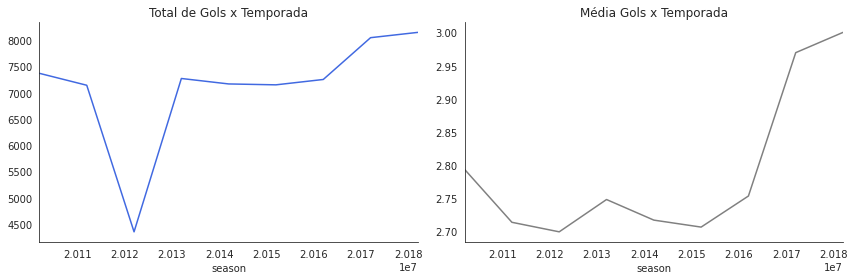

In [158]:
print("\n\n")
# grafico
fig, (ax, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
goalsMerged['totalTemporada'].plot(color='royalblue', ax=ax)
ax.set_title("Total de Gols x Temporada")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
goalsMerged['mediaTemporada'].plot(color='grey', ax=ax1)
ax1.set_title("Média Gols x Temporada")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)



plt.tight_layout()

## Goals feito e sofridos
Para uma equipe, gols por jogo jogado é uma indicação de alto nível do ataque da equipe.

Para um time, gols contra por jogo jogado é uma indicação de alto nível da defesa do time.

In [73]:
# gols feitos
teamGoals_scored_conceded = games_df.groupby(['teamName'])[
    ['goals_scored', 'goals_conceded']].mean().sort_values(by='goals_scored', ascending=False)
teamGoals_scored_conceded = teamGoals_scored_conceded[['goals_scored', 'goals_conceded']].rename(
    columns={'goals_scored': '%. gols_marcados', 'goals_conceded': '%. gols_sofridos'})

teamGoals_scored_conceded


,%. gols_marcados,%. gols_sofridos
teamName,,
Golden Knights,3.157068,2.764398
Penguins,3.137423,2.674847
Lightning,3.106329,2.801266
Bruins,3.013547,2.475369
Blackhawks,3.005044,2.738966
Capitals,2.968905,2.613184
Sharks,2.935404,2.673292
Jets,2.929122,2.878274
Maple Leafs,2.898769,3.047880


### Boxplot goals feitos
O Box Plot baseia-se na localização dos quartis (quartil1, quartil2 ou mediana, quartil3), que são três valores que dividem um conjunto de dados (ordenado de forma crescente) em quatro sub-intervalos, cada um com 25% das observações.



<center><img width=50% src="http://www.harbor.com.br/wp-content/uploads/2017/07/Box_Plot_quartil.bmp"</center>


.mostra a distribuição desses gols

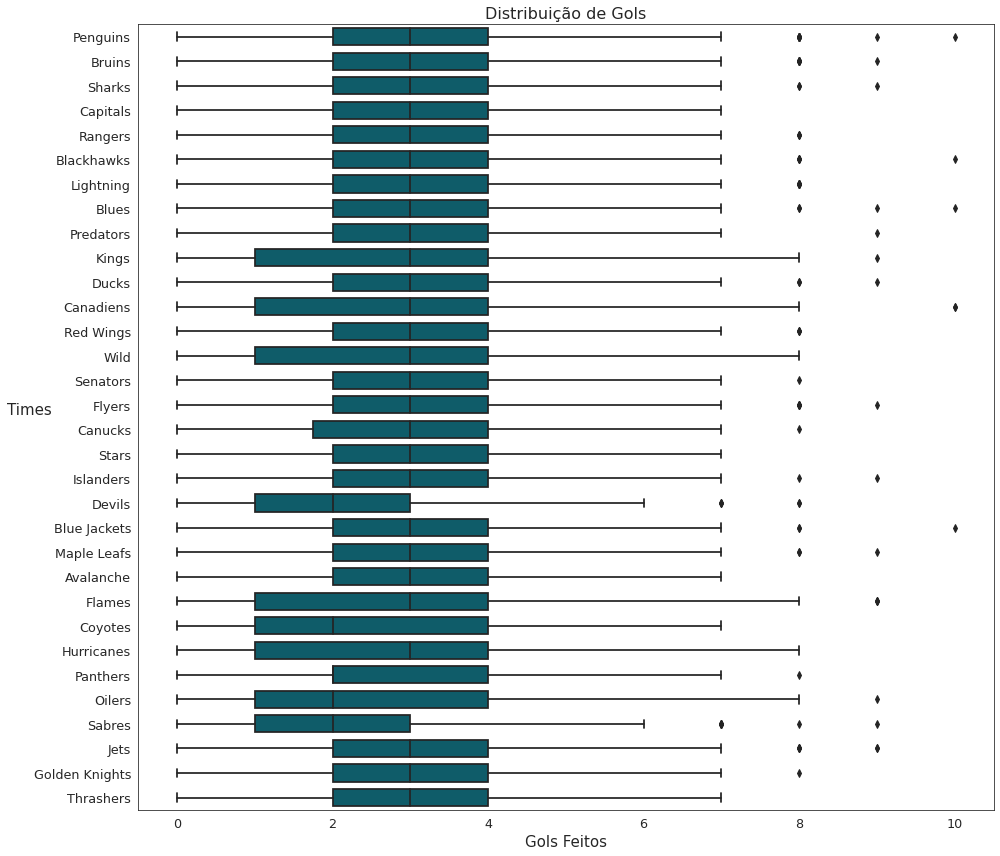

In [74]:
silver = ['#006778']
fig, ax = plt.subplots(figsize=(14, 12))

sns.boxplot(y='teamName', x='goals_scored', data=games_df,
            order=games_df['teamName'].value_counts().index, palette=silver , width=0.7, ax=ax, linewidth=1.75)

ax.tick_params(labelsize=12.75)
ax.set_title('Distribuição de Gols', fontsize=16)
ax.set_xlabel('Gols Feitos', fontsize=15)
ax.set_ylabel('Times', fontsize=15, rotation=0)
plt.tight_layout()

### Boxplot goals sofridos

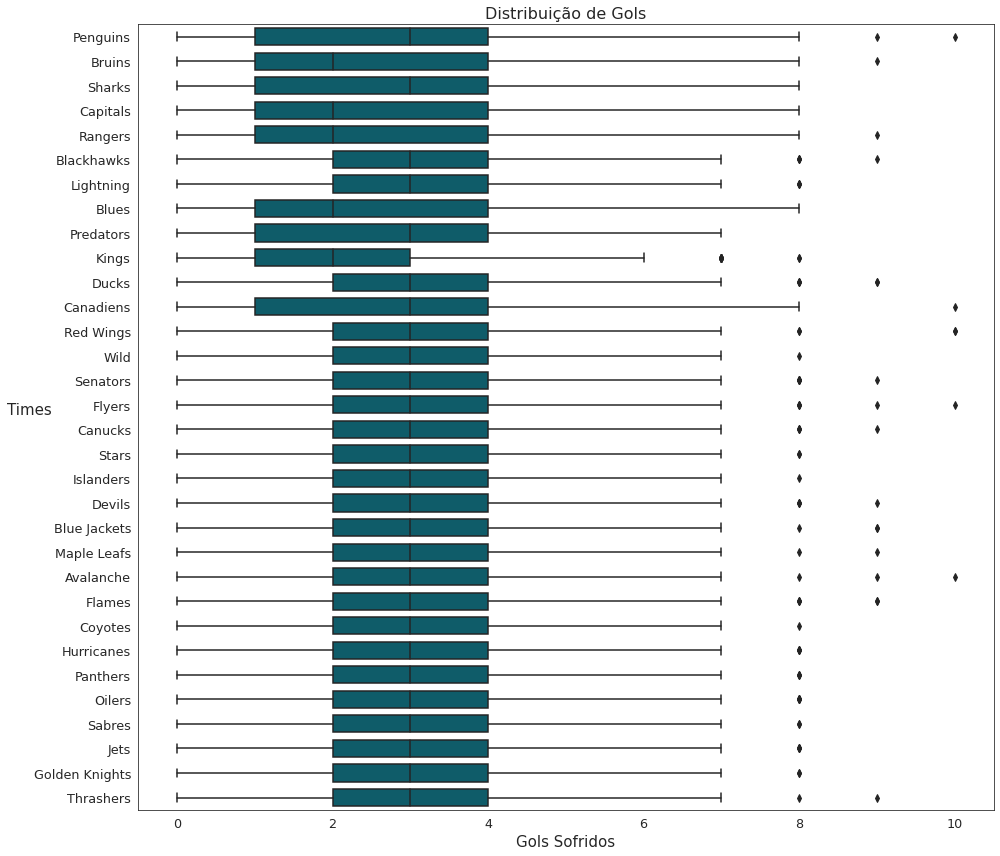

In [75]:
silver = ['#006778']

fig, ax = plt.subplots(figsize=(14, 12))
sns.boxplot(y='teamName', x='goals_conceded', data=games_df,
            order=games_df['teamName'].value_counts().index, palette=silver, width=0.7, ax=ax)

ax.tick_params(labelsize=12.75)
ax.set_title('Distribuição de Gols', fontsize=16)
ax.set_xlabel('Gols Sofridos', fontsize=15)
ax.set_ylabel('Times', fontsize=15, rotation=0)
plt.tight_layout()

## GD Goals Diff

Goal differential é o número de gols marcados por uma equipe menos o número de gols sofridos, ou GF - GA = GD


In [76]:
games_df['goal_diff'] = games_df['goals_scored'] - games_df['goals_conceded']

goals_diff = games_df.groupby(['teamName'])['goal_diff'].mean().sort_values(ascending=False)
goals_diff

teamName
Bruins            0.538177
Penguins          0.462577
Golden Knights    0.392670
Capitals          0.355721
Lightning         0.305063
Blues             0.289340
Blackhawks        0.266078
Sharks            0.262112
Rangers           0.182045
Kings             0.176245
Predators         0.162643
Ducks             0.111111
Jets              0.050847
Canadiens         0.019973
Stars            -0.012228
Wild             -0.018717
Flyers           -0.059060
Blue Jackets     -0.073871
Flames           -0.081492
Red Wings        -0.095872
Canucks          -0.116935
Islanders        -0.145380
Maple Leafs      -0.149111
Senators         -0.254692
Hurricanes       -0.255911
Avalanche        -0.266118
Panthers         -0.292887
Devils           -0.297408
Coyotes          -0.371547
Oilers           -0.475593
Thrashers        -0.560976
Sabres           -0.569620
Name: goal_diff, dtype: float64

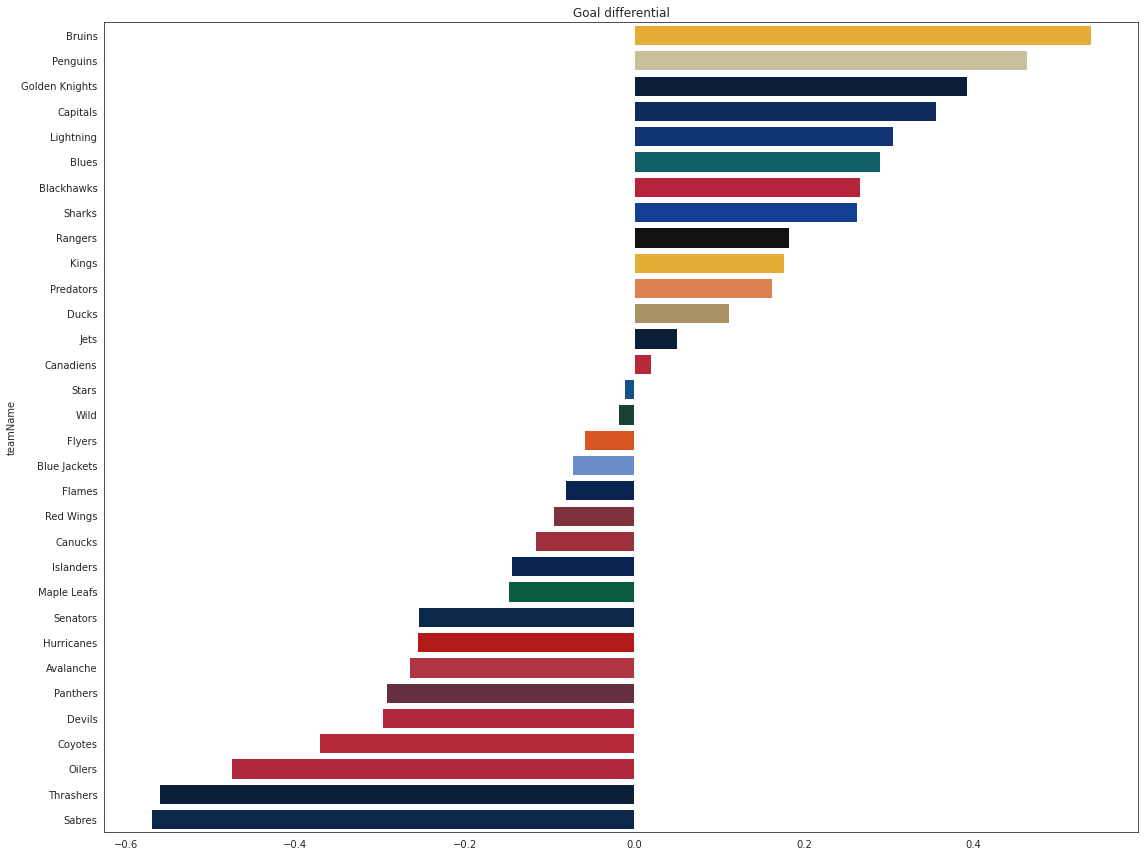

In [77]:
teams_color_palette2 = ['#FFB81C',  # Bruins
                        '#CFC493',  # Penguins
                        '#041E42',  # Capitals
                        '#002868',  # Lightning
                        '#002F87',  # Blues
                        '#006D75',  # Sharks
                        '#CF0A2C',  # Blackhawks
                        '#0038A8',  # Rangers
                        '#111111',  # Kings
                        '#FFB81C',  # Predators
                        '#F47A38',  # Ducks
                        '#B4975A',  # Golden Knights
                        '#041E42',  # Jets
                        '#CE1126',  # Canadiens
                        '#00539B',  # Stars
                        '#154734',  # Wild
                        '#F74902',  # Flyers
                        '#5C88DA',  # Thrashers
                        '#00205B',  # Blue Jackets
                        '#8C2633',  # Flames
                        '#AF1E2D',  # Red Wings
                        '#00205B',  # Canucks
                        '#006847',  # Islanders
                        '#002654',  # Maple Leafs
                        '#CC0000',  # Hurricanes
                        '#C52032',  # Senators
                        '#6F263D',  # Avalanche
                        '#C8102E',  # Panthers
                        '#CE1126',  # Devils
                        '#C8102E',  # Coyotes
                        '#041E42',  # Oilers
                        '#002654',  # Sabres
                        ]

fig, ax = plt.subplots(figsize=(16, 12))

sns.barplot(x=goals_diff.values, y=goals_diff.index, ax=ax, palette=teams_color_palette2)

plt.title("Goal differential")

plt.tight_layout()

## Evolução dos times em relação aos gols

In [0]:
teams_list = list(games_df['teamName'].unique())
teams_list.remove('Thrashers')

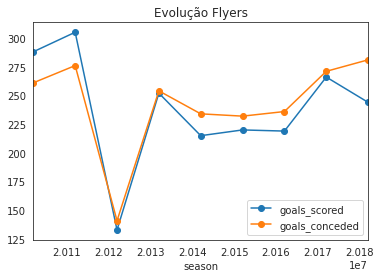

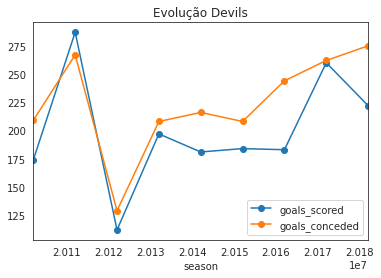

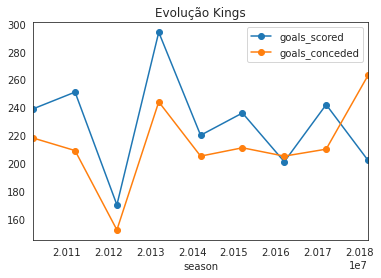

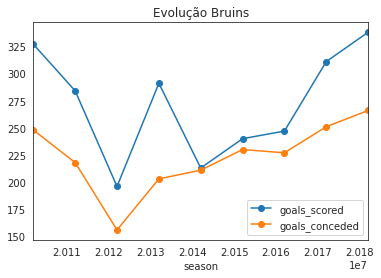

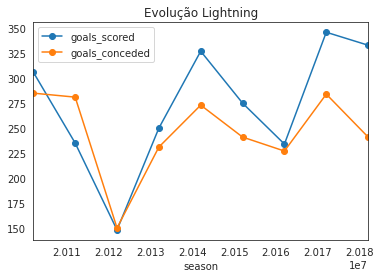

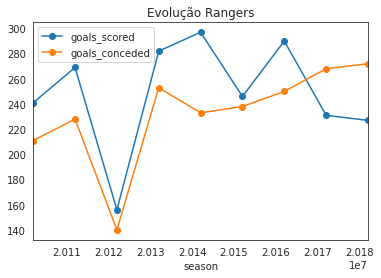

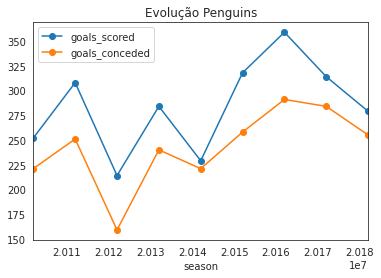

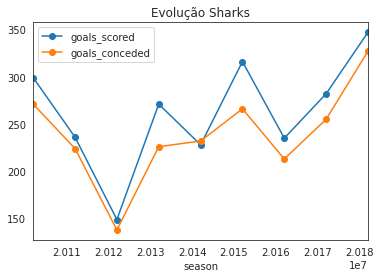

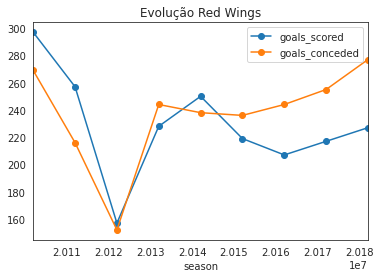

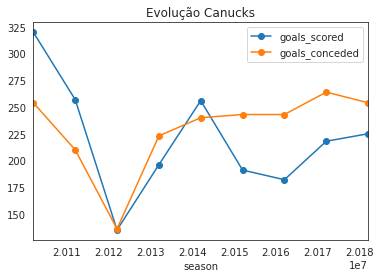

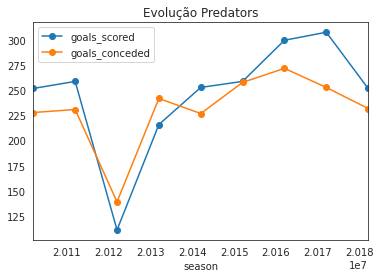

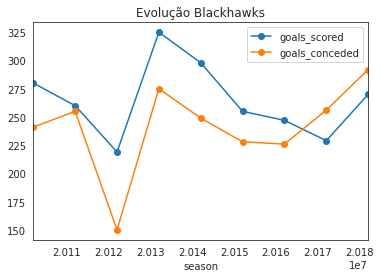

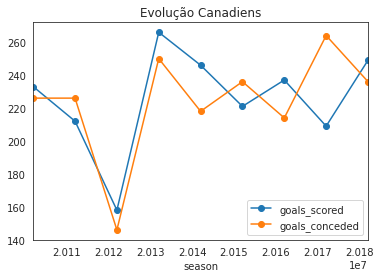

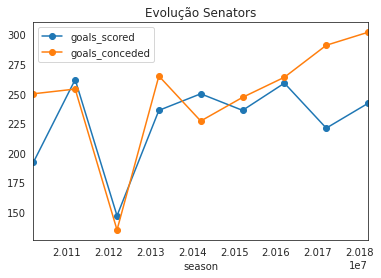

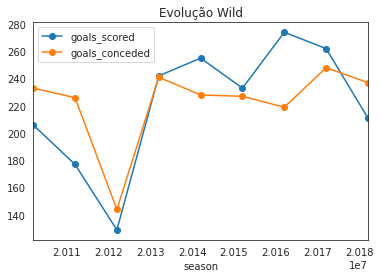

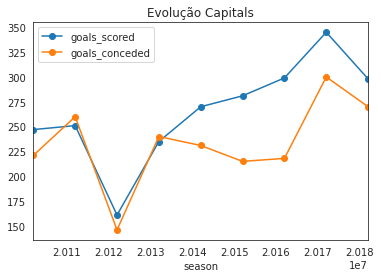

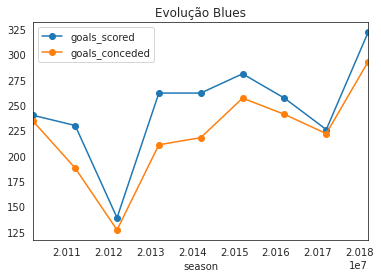

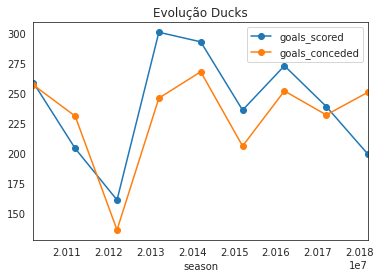

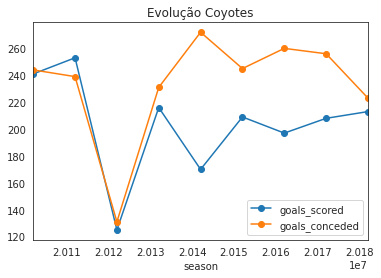

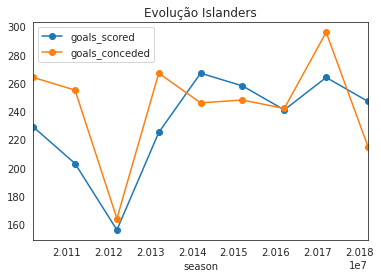

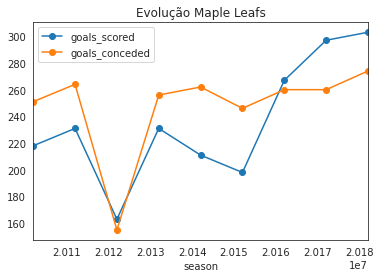

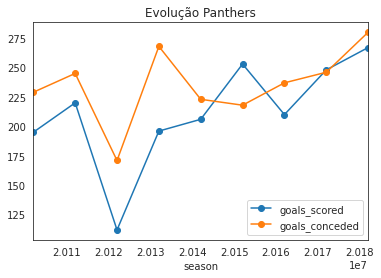

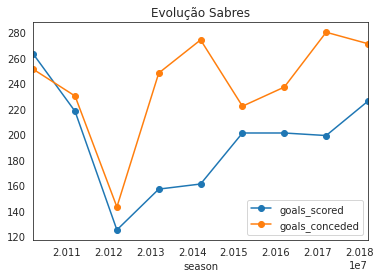

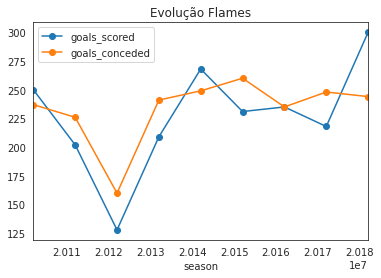

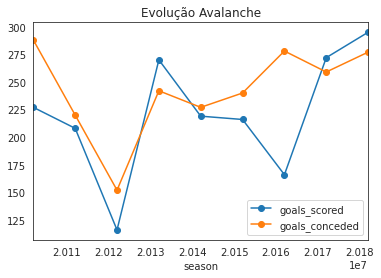

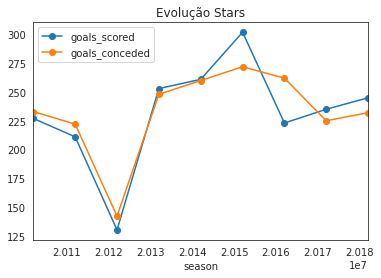

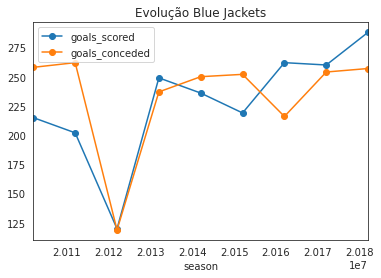

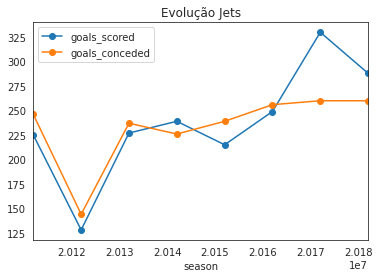

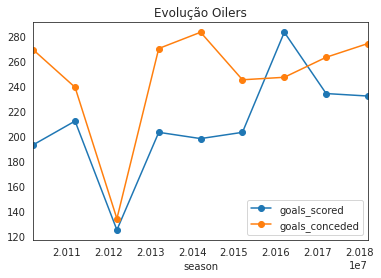

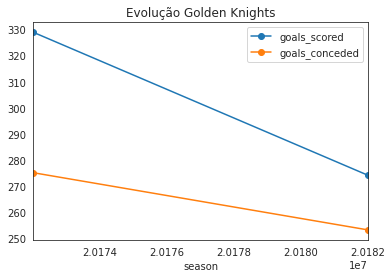

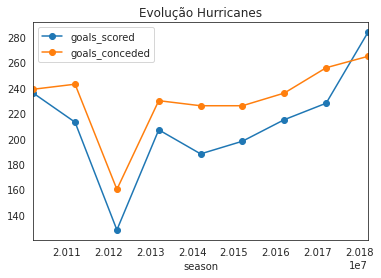

In [79]:
for name in teams_list:
    games_df[(games_df['teamName'] == name)].groupby('season')[
      'goals_scored', 'goals_conceded'].sum().plot(title=('Evolução ' + name), marker='o');


# Decompor time series


In [80]:
games_df.head()

,game_id,date_time_GMT,teamName,goals_scored,goals_conceded,type,season,ground,outcome,goal_diff
0,2011030221,2012-04-29 19:00:00,Flyers,4,3,P,20112012,Home,Win,1
1,2011030222,2012-05-01 23:30:00,Flyers,1,4,P,20112012,Home,Lose,-3
2,2011030223,2012-05-03 23:30:00,Devils,4,3,P,20112012,Home,Win,1
3,2011030224,2012-05-06 23:30:00,Devils,4,2,P,20112012,Home,Win,2
4,2011030225,2012-05-08 23:30:00,Flyers,1,3,P,20112012,Home,Lose,-2


In [0]:
games_df['year'] = games_df['date_time_GMT'].dt.year
games_df['month'] = games_df['date_time_GMT'].dt.month
games_df['day'] = games_df['date_time_GMT'].dt.day
games_df['hour'] = games_df['date_time_GMT'].dt.hour
games_df['day_of_week'] = games_df['date_time_GMT'].dt.dayofweek

In [82]:
games_df.head()

,game_id,date_time_GMT,teamName,goals_scored,goals_conceded,type,season,ground,outcome,goal_diff,year,month,day,hour,day_of_week
0,2011030221,2012-04-29 19:00:00,Flyers,4,3,P,20112012,Home,Win,1,2012,4,29,19,6
1,2011030222,2012-05-01 23:30:00,Flyers,1,4,P,20112012,Home,Lose,-3,2012,5,1,23,1
2,2011030223,2012-05-03 23:30:00,Devils,4,3,P,20112012,Home,Win,1,2012,5,3,23,3
3,2011030224,2012-05-06 23:30:00,Devils,4,2,P,20112012,Home,Win,2,2012,5,6,23,6
4,2011030225,2012-05-08 23:30:00,Flyers,1,3,P,20112012,Home,Lose,-2,2012,5,8,23,1


In [83]:
games_df[(games_df['teamName'] == 'Blues') & (games_df['season'] == 20182019)].groupby(['outcome','ground'])['day_of_week'].value_counts()

outcome  ground  day_of_week
Lose     Away    3               6
                 6               5
                 4               4
                 0               2
                 1               2
                 2               2
                 5               2
         Home    6              12
                 2               3
                 1               2
                 3               2
                 4               2
                 5               2
                 0               1
Win      Away    5               9
                 6               6
                 3               5
                 4               5
                 1               4
                 2               2
         Home    2               8
                 4               8
                 5               8
                 1               3
                 6               3
Name: day_of_week, dtype: int64

0-seg,1-ter,2-qua,3-qui,4-sex,5-sab,6-dom